<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Анализ-распределений-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Анализ-распределений-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ распределений размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-Проверка-лучшей-модели-на-тестовой-выборке." data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-Проверка-лучшей-модели-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества кросс-валидацией. Проверка лучшей модели на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd, numpy as np #импортируем библиотеки pandas
import matplotlib.pyplot as plt #импортируем библиотеку plt
from sklearn.model_selection import GridSearchCV #импортируем GridSearchCV
from sklearn.model_selection import RandomizedSearchCV #импортируем RandomizedSearchCV
from sklearn.metrics import make_scorer #импортируем make_scorer
from sklearn.model_selection import cross_val_score #импортируем cross_val_score
from sklearn.linear_model import LinearRegression #импортируем библиотеку LinearRegression
from sklearn.tree import DecisionTreeRegressor #импортируем библиотеку DecisionTreeRegression
from sklearn.ensemble import RandomForestRegressor #импортируем библиотеку RandomForestRegression
from sklearn.metrics import mean_absolute_error #импортируем функцию mean_absolute_error
from sklearn.dummy import DummyRegressor #импортируем библиотеку DummyRegressor
import warnings #импортируем библиотеку warnings
warnings.filterwarnings('ignore')

Так как данные индексируются датой и временем получения информации (признак date), сразу при считывании данных индексируем date и преобразуем в дату со временем

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True) #считаем файл с данными и сохраним в data_train
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True) #считаем файл с данными и сохраним в data_test
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True) #считаем файл с данными и сохраним в data_full

In [3]:
def get_info(dataset):
    display(dataset.head(10)) #получим первые 10 строк таблицы
    dataset.info() #получим общую информацию о данных в таблице
    display(dataset.describe()) #получим также разброс значений, максимум, минимум, среднее и медиану
    display("Доля пропущенных значений:", dataset.isna().mean()) #получим долю пропущенных значений среди всех данных
    print("Количество дубликатов:", dataset.duplicated().sum()) #получим количество дубликатов

In [4]:
get_info(data_train) #применим функцию для data_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


'Доля пропущенных значений:'

final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
final.output.recovery                         0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 86, dtype: float64

Количество дубликатов: 0


In [5]:
get_info(data_test) #применим функцию для data_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


'Доля пропущенных значений:'

primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.input.feed_au                         0.000000
rougher.in

Количество дубликатов: 0


In [6]:
get_info(data_full) #применим функцию для data_full

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


'Доля пропущенных значений:'

final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
final.output.recovery                         0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 86, dtype: float64

Количество дубликатов: 0


###### Вывод

В таблице data_train 86 столбцов, data_test 52 столбца, data_full 86 столбцов. Типы данных в столбцах — float64.

В названии колонок нарушения стиля нет.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Дубликатов нет.

В тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Чтобы двигаться дальше, нужно устранить эти проблемы.


### Расчет эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно.
Вычислим её на обучающей выборке для признака rougher.output.recovery и найдем MAE между получившимися расчётами и значением признака.

Эффективность обогащения рассчитывается по формуле

    recovery = (c*(f-t))/(f*(c-t))*100
где:

    C — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.

Напишем функцию, рассчитывающую по вышеописанной формуле, эффективность обогащения.

In [7]:
#функция для расчета эффективности обогащения
def recovery (c, f, t):
    result = (c*(f-t))/(f*(c-t))*100
    return result

Применим функцию к 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au'.

In [8]:
data_train['recovery'] = recovery(data_train['rougher.output.concentrate_au'], #функцией recovery с параметрами c, f, t вычислим эффективность обогащения
                                  data_train['rougher.input.feed_au'],
                                  data_train['rougher.output.tail_au'])
 
mae = mean_absolute_error(data_train['rougher.output.recovery'], data_train['recovery']) #функцией mean_absolute_error вычислим mae
print('MAE:', mae)

MAE: 9.73512347450521e-15


###### Вывод

Метрика MAE измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.

Исходя из результатов, значение MAE бесконечно мало, практически приравнивается к нулю. Это означает отсутствие ошибки.

Таким образом, эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке.

Для того, чтобы получить признаки, которых нет в data_test, функцией set() создадим множества из data_train и data_test.
Затем применим метод difference, который выдает разницу между множествами data_train и data_test

In [9]:
columns_diff = set(data_train).difference(set(data_test)) #получим столбцы, которых нет в тестовой выборке
columns_diff

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

###### Вывод

Эти параметры - данные по выходу продукции типа float64. Очевидно, что их в обучающей выборке до начала процесса быть не должно. На этапе выделения признаков на обучающей выборке для обучения модели, их необходимо удалить.

### Предобработка данных

На этапе изучения данных выявили пропущенные значения.

Так как соседние по времени параметры часто похожи, применим для заполнения пропусков метод 'ffill', т.е. заполнение предыдущим значением.

In [10]:
data_train = data_train.fillna(method='ffill') #методом ffill заполним пропуски в data_train
data_test = data_test.fillna(method='ffill') #методом ffill заполним пропуски в data_test
data_full = data_full.fillna(method='ffill') #методом ffill заполним пропуски в data_full

Проверим данные.

In [11]:
data_train.isna().mean() #доля пропущенных значений

final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
recovery                                      0.0
Length: 87, dtype: float64

In [12]:
data_test.isna().mean() #доля пропущенных значений

primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0


In [13]:
data_full.isna().mean() #доля пропущенных значений

final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64

###### Вывод

Заполнили пропущенные значения.

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

Напишем функцию для построения гистограмм концентраций металлов на различных этапах очистки. На вход принимает концентрации в исходном сырье, после флотации, после первичной очистки и в финальном концентрате, а также название металла.

In [14]:
def hist_metal(df, name):
    plt.figure(figsize=(12, 7))
    #в цикле строим гистограмму для каждого этапа
    for i in range(len(df)):
        plt.hist(df[i][0], bins=70, alpha=0.5, label=df[i][1])
    plt.title(name)
    plt.xlabel('Концентрация, у.е.')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    plt.show()


Построим гистограммы концентрации золота на различных этапах очистки.

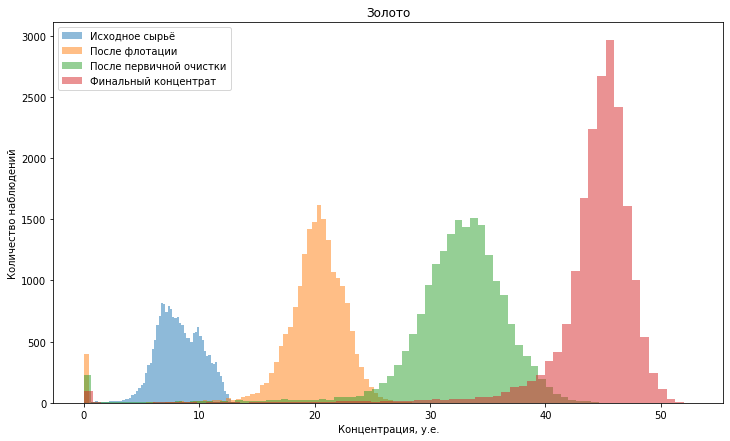

In [15]:
#функция построение гистограмм
hist_metal([[data_full['rougher.input.feed_au'], 'Исходное сырьё'],
           [data_full['rougher.output.concentrate_au'], 'После флотации'],
           [data_full['primary_cleaner.output.concentrate_au'], 'После первичной очистки'],
           [data_full['final.output.concentrate_au'], 'Финальный концентрат']], 'Золото')

Построим гистограммы концентрации серебра на различных этапах очистки.

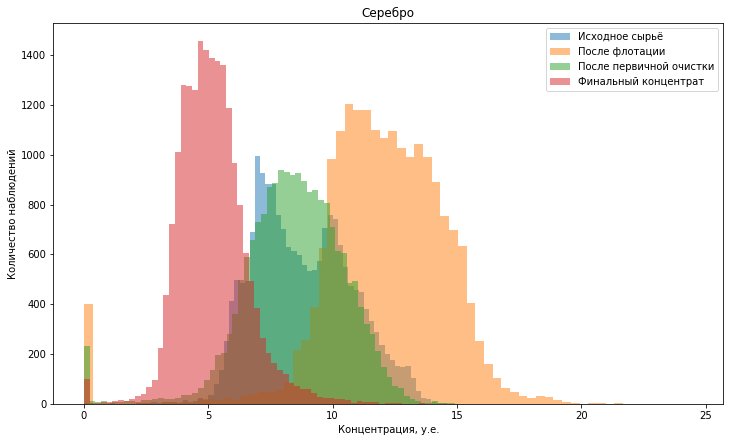

In [16]:
#функция построение гистограмм
hist_metal([[data_full['rougher.input.feed_ag'], 'Исходное сырьё'],
           [data_full['rougher.output.concentrate_ag'], 'После флотации'],
           [data_full['primary_cleaner.output.concentrate_ag'], 'После первичной очистки'],
           [data_full['final.output.concentrate_ag'], 'Финальный концентрат']], 'Серебро')

Построим гистограммы концентрации свинца на различных этапах очистки.

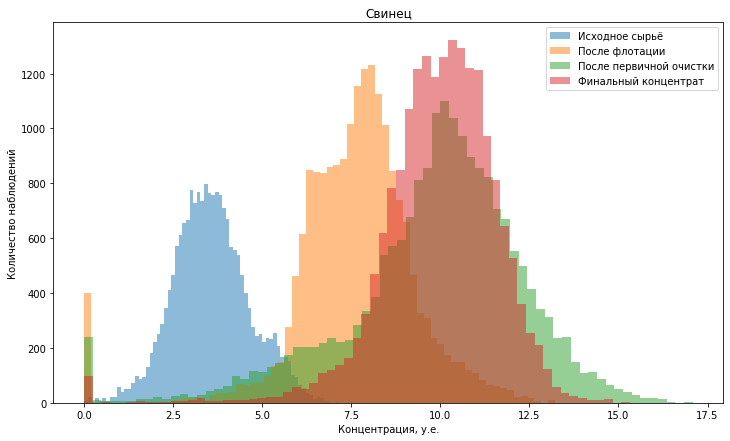

In [17]:
#функция построение гистограмм
hist_metal([[data_full['rougher.input.feed_pb'], 'Исходное сырьё'],
           [data_full['rougher.output.concentrate_pb'], 'После флотации'],
           [data_full['primary_cleaner.output.concentrate_pb'], 'После первичной очистки'],
           [data_full['final.output.concentrate_pb'], 'Финальный концентрат']], 'Свинец')

###### Вывод

Исходя из результатов, можем сказать, что:
    Концентрация золота после каждого этапа очистки растет.
    Концентрация серебра после флотации растет, затем снижается.
    Концентрация свинца после каждого этапа остается примерно на одном уровне.

### Анализ распределений размеров гранул сырья на обучающей и тестовой выборках.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

feed size — размер гранул сырья.

Построим гистограммы.

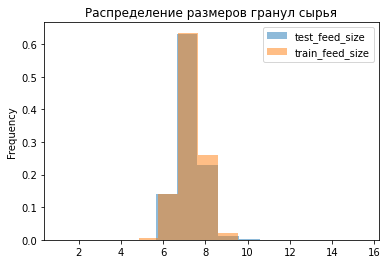

In [18]:
#определим test_feed_size и train_feed_size
test_feed_size = data_test['primary_cleaner.input.feed_size']
train_feed_size = data_train['primary_cleaner.input.feed_size']

#выведем гистограммы
test_feed_size.plot(bins=10, kind='hist', density=True, alpha=0.5, label='test_feed_size')
train_feed_size.plot(bins=10, kind='hist', density=True, alpha=0.5, label='train_feed_size')

plt.legend(loc='upper right')
plt.title('Распределение размеров гранул сырья')
plt.show()

###### Вывод

Распределения размеров гранул сырья на обучающей и тестовой выборках практически не отличаются. Это значит, что оценка модели будет правильной.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Построим гистограммы суммарных концентраций металлов на разных стадиях: в сырье, в черновом и финальном концентратах.

Функции hist_metal() на вход подадим суммы концентраций в исходном сырье, после флотации и в финальном концентрате.

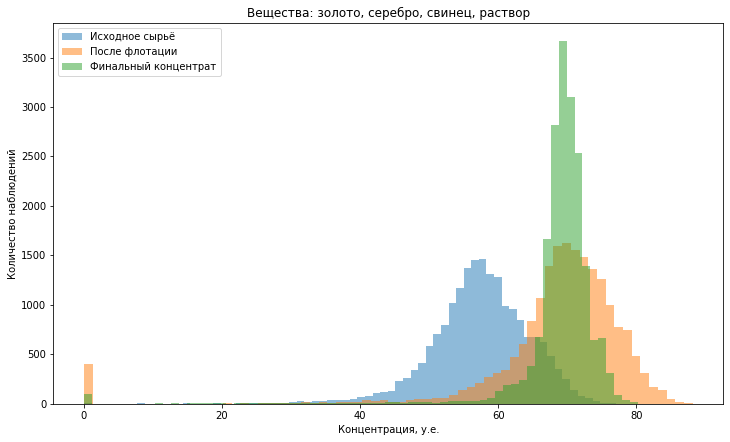

In [19]:
#функция построение гистограмм
hist_metal([[data_full['rougher.input.feed_au'] +
           data_full['rougher.input.feed_ag'] +
           data_full['rougher.input.feed_pb'] +
           data_full['rougher.input.feed_sol'], 'Исходное сырьё'],
           [data_full['rougher.output.concentrate_au'] +
           data_full['rougher.output.concentrate_ag'] +
           data_full['rougher.output.concentrate_pb'] +
           data_full['rougher.output.concentrate_sol'], 'После флотации'],
           [data_full['final.output.concentrate_au'] +
           data_full['final.output.concentrate_ag'] +
           data_full['final.output.concentrate_pb'] +
           data_full['final.output.concentrate_sol'], 'Финальный концентрат']], 'Вещества: золото, серебро, свинец, раствор')

На гистограммах есть редкие значения в 0. Нужно отбросить эти данные для эффективности обучения модели.

Выведем размер выборок.

In [20]:
display(data_test.shape)
display(data_train.shape)

(5290, 52)

(14149, 87)

Отбросим нулевые значения из обучающей и тестовой выборок.

In [21]:
#столбцы, по которым отбрасываем 0 (исходное сырье)
features_input_concentrate = ['rougher.input.feed_au', 
                              'rougher.input.feed_ag', 
                              'rougher.input.feed_pb', 
                              'rougher.input.feed_sol']

#столбцы, по которым отбрасываем 0 (после флотации)
features_output_concentrate = ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']

#столбцы, по которым отбрасываем 0 (финальный концентрат)
features_final_concentrate = ['final.output.concentrate_au',
                              'final.output.concentrate_ag',
                              'final.output.concentrate_pb',
                              'final.output.concentrate_sol']

#отбрасываем на обучающей выборке
data_train = data_train[data_train[features_input_concentrate].sum(1) > 0]
data_train = data_train[data_train[features_output_concentrate].sum(1) > 0]
data_train = data_train[data_train[features_final_concentrate].sum(1) > 0]

#отбрасываем на тестовой выборке
data_test = data_test[data_full[features_input_concentrate].sum(1) > 0]
data_test = data_test[data_full[features_output_concentrate].sum(1) > 0]
data_test = data_test[data_full[features_final_concentrate].sum(1) > 0]

display(data_test.shape)
display(data_train.shape)

(5154, 52)

(13795, 87)

###### Вывод

Изучив распределения суммарных концентраций всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах, выявили аномальные нулевые значения. Так как аномальные данные способны значительно ухудшить работу моделей, решено было удалить. 

## Модель

### Функция для вычисления итоговой sMAPE.

Метрика sMAPE вычисляется так:
    
    smape = 1 / len(target) * sum(|target - predictions| / ((|target| + |predictions|) / 2) * 100
                                  
Обозначения:

    target - значение целевого признака
    predictions - значение предсказания
    len - количество объектов в выборке.
    sum - суммирование по всем объектам выборки.
   

Напишем функцию для вычисления sMAPE.

In [22]:
def calc_smape(target, predictions):
    diff_tp = np.abs(target - predictions) #разность по модулю target и predictions
    mean_tr = (np.abs(target) + np.abs(predictions)) / 2 #среднее target и predictions
    smape = 1 / len(target) * np.sum(diff_tp / mean_tr) * 100
    return smape

Итоговая метрика складывается из двух величин:
    
    final_smape = 0.25 * smape(rougher) + 0.75 * smape(final)

Обозначения:
    
    smape(rougher) - эффективность обогащения чернового концентрата rougher.output.recovery
    smape(final) - эффективность обогащения финального концентрата final.output.recovery.

Напишем функцию для вычисления итоговой sMAPE.

In [23]:
def calc_final_smape(target, predictions):
    target_rougher = target['rougher.output.recovery'] #определим target для rougher
    target_final = target['final.output.recovery'] #определим target для final
    predictions_rougher = predictions[:, 0] #определим predictions для rougher
    predictions_final = predictions[:, 1] #определим predictions для final
    final_smape = 0.25 * calc_smape(target_rougher, predictions_rougher) + 0.75 * calc_smape(target_final, predictions_final)
    return final_smape

Сохраним функцию в переменной smape_scorer.

In [24]:
smape_scorer = make_scorer(calc_final_smape, greater_is_better=False)
smape_scorer

make_scorer(calc_final_smape, greater_is_better=False)

### Обучение разных моделей и оценка их качества кросс-валидацией. Проверка лучшей модели на тестовой выборке.

На  этапе анализа признаков, недоступных в тестовой выборке, были выявлены признаки, необходимые для удаления из обучающей выборки.

Удалим эти столбцы и обозначим признаки и цель. В нашем случае целевыми признаками являются 'rougher.output.recovery', 'final.output.recovery'.

In [25]:
columns_features = data_train.drop(columns_diff, axis = 1).columns #удалим столбцы из обучающей выборки и запишем оставшиеся в columns_features
columns_target = ['rougher.output.recovery', 'final.output.recovery'] #запишем целевые признаки в columns_target

features_train = data_train[columns_features].reset_index(drop = True) #определим признаки для обучающей выборки
target_train = data_train[columns_target].reset_index(drop = True) #определим целевые признаки для обучающей выборки

target_test = data_full[columns_target].loc[data_test.index] #определим целевые признаки для тестовой выборки
features_test = data_test.reset_index(drop = True) #определим признаки для тестовой выборки

Проверим размеры выборок.

In [26]:
print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(13795, 52) (13795, 2)
(5154, 52) (5154, 2)


###### Модель дерева решений

Применим метод GridSearchCV для выявления наилучших гиперпараметров для модели дерева решений и расчета итоговой smape.

In [27]:
model_dt = DecisionTreeRegressor(random_state=12345)
params = {'max_depth' : range(1,10)} #определим гиперпараметры

grid = GridSearchCV(model_dt, params, scoring=smape_scorer, cv=5, n_jobs=-1) #применим GridSearchCV для модели model_dt
grid.fit(features_train, target_train) #обучим модель

print('Лучшее значение метрики smape для модели дерева решений:', -grid.best_score_) #выведем наилучший показатель
print('Лучшие параметры для модели дерева решений:', grid.best_params_) #выведем наилучшие параметры

Лучшее значение метрики smape для модели дерева решений: 8.987481089659127
Лучшие параметры для модели дерева решений: {'max_depth': 1}


###### Модель случайного леса

Применим метод RandomizedSearchCV для выявления наилучших гиперпараметров для модели случайного леса и расчета итоговой smape.

In [28]:
model_rf = RandomForestRegressor(random_state=12345)
params = {'n_estimators' : range(10,20,5), #определим гиперпараметры
          'max_depth' : range(1,16,2)}

grid = RandomizedSearchCV(model_rf, params, scoring=smape_scorer, cv=5, n_jobs=-1) #применим RandomizedSearchCV для модели model_rf
grid.fit(features_train, target_train) #обучим модель

print('Лучшее значение метрики smape для модели случайного леса:', -grid.best_score_) #выведем наилучший показатель
print('Лучшие параметры для модели случайного леса', grid.best_params_) #выведем наилучшие параметры

Лучшее значение метрики smape для модели случайного леса: 8.824893322706567
Лучшие параметры для модели случайного леса {'n_estimators': 10, 'max_depth': 3}


###### Модель линейной регрессии

Применим метод cross_val_score для расчета итоговой smape модели линейной регрессии.

In [29]:
model_lr = LinearRegression()
smape = cross_val_score(model_lr, features_train, target_train, scoring = smape_scorer, cv=5) #вычислим итоговую smape
smape = smape.mean() #найдем среднее smape

print('Лучшее значение метрики smape для модели линейной регрессии:', -smape)

Лучшее значение метрики smape для модели линейной регрессии: 10.059602069093554


###### Вывод

Итак, качество модели решающего дерева при глубине 1 равно 8.99, качество модели случайного леса при количестве деревьев 10 и глубине 3 равно 8.82 и качество модели линейной регрессии равно 10.06.

Самое лучшее качество у модели случайного леса.

###### Проверка наилучшей модели на тестовой выборке

Проверим модель случайного леса на тестовой выборке.

In [30]:
model_rf = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=3)
model_rf.fit(features_train, target_train) #обучим модель
predicted_test_rf = model_rf.predict(features_test) #получим предсказания модели
smape_rf = calc_final_smape(target_test, predicted_test_rf) #вычислим итоговую smape
smape_rf

6.974180710095055

###### Вывод

При проверке модели случайного леса на тестовой выборке значение метрики качества составила 6.97.

###### Проверка модели на адекватность

Cравним модель со случайной, так мы сможем оценить её адекватность, или проверить на вменяемость. Для этого импортируем библиотеку DummyRegressor.

In [31]:
dc_model = DummyRegressor()
dc_model.fit(features_train, target_train) # обучим модель на тренировочной выборке
predicted_test_dc = dc_model.predict(features_test) #получим предсказания модели
smape_dc = calc_final_smape(target_test, predicted_test_dc) #вычислим итоговую smape
smape_dc

7.766604067388526

###### Вывод

Значение метрики SMAPE нашей полученной модели ниже константной. Таким образом, модель адекватна.

## Общий вывод

Таким образом, наилучшей моделью является модель случайного леса. Качество модели на обучающей выборке при количестве деревьев 10 и глубине 3 равно 8.82. Качество модели на тестовой выборке при количестве деревьев 10 и глубине 3 равно 6.97. После проверки модели на вменяемость, получили, что модель адекватна.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке